In [75]:
import pandas as pd
import networkx as nx
import os
from matplotlib import pyplot as plt
%run graph_operator.py
%matplotlib inline

In [48]:
datadirectory = '/Users/zhaowanhe/facebook'#specify the directory your dataset in
efnames = [datadirectory + '/' +  f for f in os.listdir(datadirectory) if 'edges' in f]
g = nx.Graph()
len(efnames)

10

In [49]:
for efname in efnames:
    ELdf = pd.read_csv(efname,sep=' ',header=None)
    eliter = ELdf.iterrows()
    for e in eliter:
        g.add_edge(*tuple(e[1]))

In [50]:
g.number_of_edges()

84243

In [51]:
graphs = list(nx.connected_component_subgraphs(g))

In [52]:
g.number_of_nodes()

3959

In [53]:
graphs.sort(key = lambda x : x.number_of_nodes(), reverse = True)
[x.number_of_nodes() for x in graphs]

[3927, 6, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]

In [76]:
g1 = GraphOperator(graphs[0], "normalized laplacian");

In [85]:
list_subgraph_nodes = g1.partition(3)

In [89]:
[len(i) for i in list_subgraph_nodes]


[730, 2137, 1060]

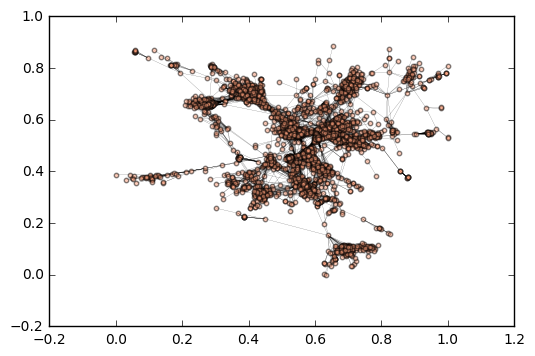

In [91]:
g1.draw_graph(labels = False, node_size = 10, width = 0.1)

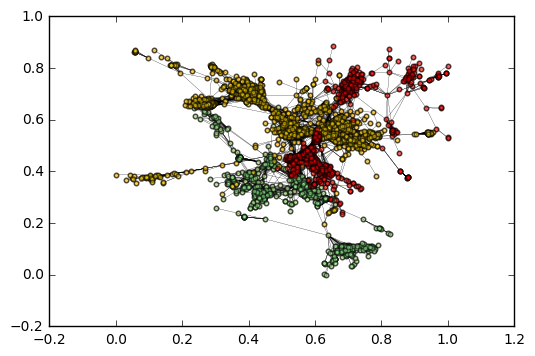

In [88]:
g1.draw_partitionGraph(list_subgraph_nodes, list_color = ['palegreen', 'gold', 'r'], labels = False, node_size = 10, width = 0.1)

In [80]:
list_subgraph_nodes = g1.partition(4)

In [83]:
[len(i) for i in list_subgraph_nodes]

[1060, 730, 1371, 766]

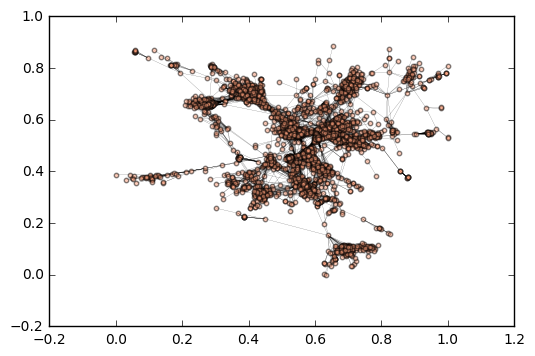

In [81]:
g1.draw_graph(labels = False, node_size = 10, width = 0.1)

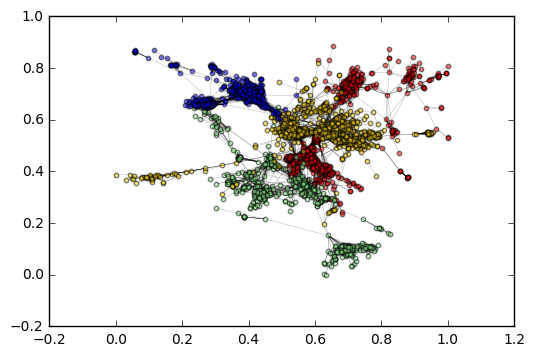

In [82]:
g1.draw_partitionGraph(list_subgraph_nodes, list_color = ['red', 'palegreen', 'gold', 'blue'], labels = False, node_size = 10, width = 0.1)